# 3D Eye-Tracking Scene Visualization

This notebook demonstrates a single 3D scene visualization of the eye-tracking system with zero rotation, showing the spatial relationship between eyes, cameras, and LEDs.

## Imports and Setup

In [ ]:
%matplotlib widget

import seet.device as device
import seet.scene as scene
import seet.user as user
import seet.visualization.scene_visualization as scene_visualization
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import sys
sys.path.append("..")
import utils

dropdown_widget = utils.get_experiment_info(save_results=False)

RadioButtons(description='Device:', options=('default',), value='default')

## Create Scene Model

In [2]:
# Create a scene
scene_file_name, _ = \
    utils.get_configuration_files(dropdown_widget.value)  # type: ignore

et_scene = scene.SceneModel(parameter_file_name=scene_file_name)

print(f"Scene loaded from: {scene_file_name}")
print(f"Number of eyes: {len(et_scene.user.eyes)}")
print(f"Number of subsystems: {len(et_scene.device.subsystems)}")

Scene loaded from: C:\Users\padossa\repos\seet-1\seet\scene\default_scene/default_scene.json
Number of eyes: 2
Number of subsystems: 2


## 3D Scene Visualization (Zero Rotation)

Display the 3D eye-tracking scene with no gaze rotation (0°, 0°).

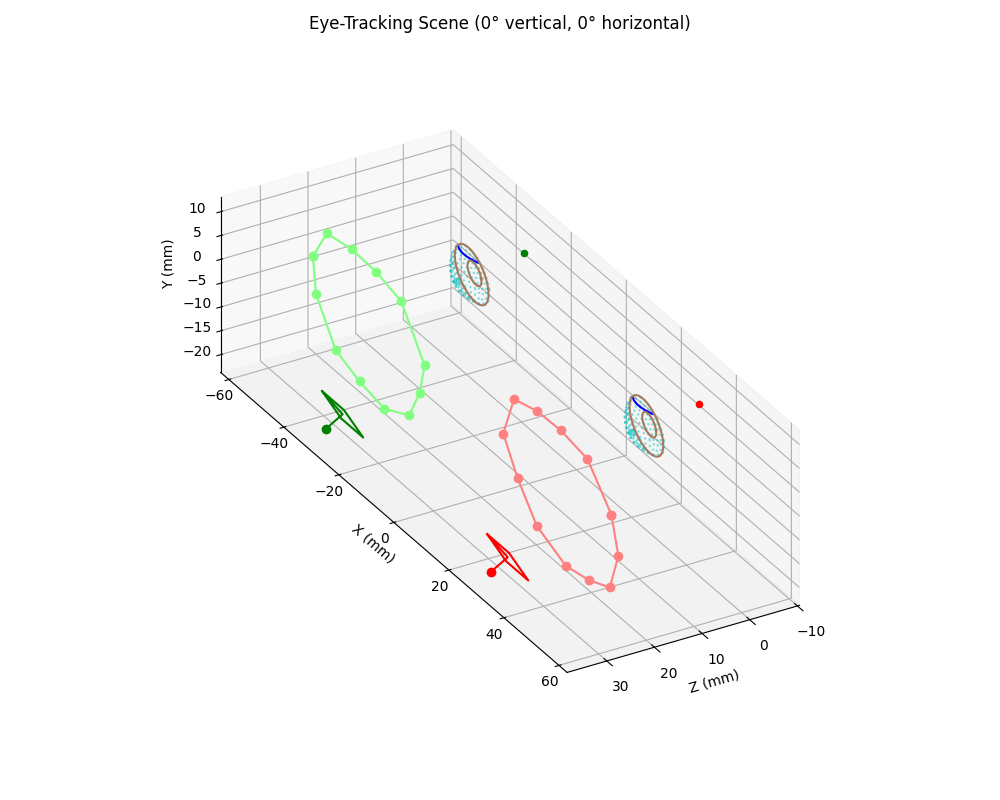

In [3]:
# Create a single 3D plot with zero rotation
fig = plt.figure(figsize=(10, 8))

# Zero rotation angles (rotation around x, rotation around y)
angles = (0.0, 0.0)

# Apply rotation to eyes
for eye in et_scene.user.eyes:
    eye.rotate_from_gaze_angles_inParent(angles)

# Create 3D axes
axs_3D = fig.add_subplot(
    1, 1, 1,
    projection="3d",
    proj_type="ortho",
    computed_zorder=True
)

# Set view angle
axs_3D.view_init(azim=60, elev=30, vertical_axis="y")

# Visualize the scene
et_scene_visualization = \
    scene_visualization.SceneModelVisualization(
        et_scene, axs_3D, visualization_node=et_scene
    )

et_scene_visualization.visualize()

# Add title and labels
axs_3D.set_title("Eye-Tracking Scene (0° vertical, 0° horizontal)")
axs_3D.set_xlabel("X (mm)")
axs_3D.set_ylabel("Y (mm)")
axs_3D.set_zlabel("Z (mm)")

# Reset rotation
for eye in et_scene.user.eyes:
    eye.unrotate_from_gaze_angles_inParent(angles)

plt.tight_layout()
plt.show()